In [1]:
# Build a ping percentile plot

import matplotlib.pyplot as plt
from numpy import percentile
from csv import reader
import math

ROOT="/run/media/haxolotl/Backup/GitRoot/libapollo-rust"

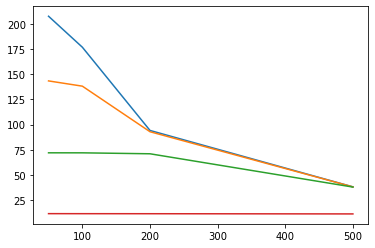

In [4]:
# Plot Tput vs Delta for f=4,8,16,32, w=40

faults = [4,8,16,32]
w = 40000

new_data = {}
new_data["x"] = []
new_data["y"] = []

from copy import deepcopy

shs_data = {}
apl_data = {}

Faults = 4
Protocol="synchs"


for Faults in faults:
    File = f"{ROOT}/data/Jan20/c5/vary-d/F{Faults}/w{w}-{Faults}-{Protocol}-run-cleaned.csv"
    # print(File)
    shs_data[Faults] = deepcopy(new_data)
    with open(File) as f:
        rdr = reader(f)
        for row in rdr:
            delta = int(row[0])
            tput = float(row[1])/1000
            lat = float(row[2])
            shs_data[Faults]["x"].append(delta)
            shs_data[Faults]["y"].append(tput)
# print(data)
for f in shs_data:
    plt.plot(shs_data[f]["x"], shs_data[f]["y"], label=f"Synchs-f{f}")

plt.legend()
